In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/all-hacker-news-posts-stories-askshow-hn-polls/hn.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../input/all-hacker-news-posts-stories-askshow-hn-polls/hn.csv')

In [4]:
df.head()

,Object ID,Title,Post Type,Author,Created At,URL,Points,Number of Comments
0,1,Y Combinator,story,pg,2006-10-09 18:21:51,http://ycombinator.com,61,18.0
1,2,A Student's Guide to Startups,story,phyllis,2006-10-09 18:30:28,http://www.paulgraham.com/mit.html,16,1.0
2,3,Woz Interview: the early days of Apple,story,phyllis,2006-10-09 18:40:33,http://www.foundersatwork.com/stevewozniak.html,7,1.0
3,4,NYC Developer Dilemma,story,onebeerdave,2006-10-09 18:47:42,http://avc.blogs.com/a_vc/2006/10/the_nyc_deve...,5,1.0
4,5,"Google, YouTube acquisition announcement could...",story,perler,2006-10-09 18:51:04,http://www.techcrunch.com/2006/10/09/google-yo...,7,1.0


In [5]:
df.shape

(3576964, 8)

In [6]:
df.isnull().sum()

Object ID                  0
Title                   3244
Post Type                  0
Author                     0
Created At                 0
URL                   217212
Points                     0
Number of Comments         7
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576964 entries, 0 to 3576963
Data columns (total 8 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Object ID           int64  
 1   Title               object 
 2   Post Type           object 
 3   Author              object 
 4   Created At          object 
 5   URL                 object 
 6   Points              int64  
 7   Number of Comments  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 218.3+ MB


In [8]:
df['Created At']=pd.to_datetime(df['Created At'])
df['Dates'] = pd.to_datetime(df['Created At']).dt.date
df['Hours'] = pd.to_datetime(df['Created At']).dt.time

In [9]:
df.head()

,Object ID,Title,Post Type,Author,Created At,URL,Points,Number of Comments,Dates,Hours
0,1,Y Combinator,story,pg,2006-10-09 18:21:51,http://ycombinator.com,61,18.0,2006-10-09,18:21:51
1,2,A Student's Guide to Startups,story,phyllis,2006-10-09 18:30:28,http://www.paulgraham.com/mit.html,16,1.0,2006-10-09,18:30:28
2,3,Woz Interview: the early days of Apple,story,phyllis,2006-10-09 18:40:33,http://www.foundersatwork.com/stevewozniak.html,7,1.0,2006-10-09,18:40:33
3,4,NYC Developer Dilemma,story,onebeerdave,2006-10-09 18:47:42,http://avc.blogs.com/a_vc/2006/10/the_nyc_deve...,5,1.0,2006-10-09,18:47:42
4,5,"Google, YouTube acquisition announcement could...",story,perler,2006-10-09 18:51:04,http://www.techcrunch.com/2006/10/09/google-yo...,7,1.0,2006-10-09,18:51:04


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576964 entries, 0 to 3576963
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Object ID           int64         
 1   Title               object        
 2   Post Type           object        
 3   Author              object        
 4   Created At          datetime64[ns]
 5   URL                 object        
 6   Points              int64         
 7   Number of Comments  float64       
 8   Dates               object        
 9   Hours               object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 272.9+ MB


In [11]:
# Extracting yyyy-mm-dd
df['Dates'] = pd.to_datetime(df['Dates'])
df['Year'] = df['Dates'].dt.year
df['Month'] = df['Dates'].dt.month
df['Day'] = df['Dates'].dt.day

In [12]:
df['week']=df['Dates'].dt.week

In [13]:
df

,Object ID,Title,Post Type,Author,Created At,URL,Points,Number of Comments,Dates,Hours,Year,Month,Day,week
0,1,Y Combinator,story,pg,2006-10-09 18:21:51,http://ycombinator.com,61,18.0,2006-10-09,18:21:51,2006,10,9,41
1,2,A Student's Guide to Startups,story,phyllis,2006-10-09 18:30:28,http://www.paulgraham.com/mit.html,16,1.0,2006-10-09,18:30:28,2006,10,9,41
2,3,Woz Interview: the early days of Apple,story,phyllis,2006-10-09 18:40:33,http://www.foundersatwork.com/stevewozniak.html,7,1.0,2006-10-09,18:40:33,2006,10,9,41
3,4,NYC Developer Dilemma,story,onebeerdave,2006-10-09 18:47:42,http://avc.blogs.com/a_vc/2006/10/the_nyc_deve...,5,1.0,2006-10-09,18:47:42,2006,10,9,41
4,5,"Google, YouTube acquisition announcement could...",story,perler,2006-10-09 18:51:04,http://www.techcrunch.com/2006/10/09/google-yo...,7,1.0,2006-10-09,18:51:04,2006,10,9,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576959,30853436,Nike's 3-D Air Max Billboard in Japan,story,taubek,2022-03-30 10:37:50,https://musebycl.io/sports/story-behind-nikes-...,1,0.0,2022-03-30,10:37:50,2022,3,30,13
3576960,30853442,Electropedia: The World's Online Electrotechni...,story,gjvc,2022-03-30 10:39:10,https://www.electropedia.org/,1,0.0,2022-03-30,10:39:10,2022,3,30,13
3576961,30853461,Intel Core i7-12700K and i5-12600K Review: Hig...,story,rbanffy,2022-03-30 10:43:01,https://www.anandtech.com/show/17267/the-intel...,1,0.0,2022-03-30,10:43:01,2022,3,30,13
3576962,30853465,Impulse Space is betting on a future where lau...,story,rbanffy,2022-03-30 10:44:12,https://arstechnica.com/science/2022/03/impuls...,1,0.0,2022-03-30,10:44:12,2022,3,30,13


In [14]:
df['Weekday'] = df['Dates'].dt.day_name() # getting dayname from date

In [15]:
df['Hours'] = pd.to_datetime(df['Created At'])
df['Hour'] =  df['Hours'].dt.hour
df['Minute'] =  df['Hours'].dt.minute

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576964 entries, 0 to 3576963
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Object ID           int64         
 1   Title               object        
 2   Post Type           object        
 3   Author              object        
 4   Created At          datetime64[ns]
 5   URL                 object        
 6   Points              int64         
 7   Number of Comments  float64       
 8   Dates               datetime64[ns]
 9   Hours               datetime64[ns]
 10  Year                int64         
 11  Month               int64         
 12  Day                 int64         
 13  week                int64         
 14  Weekday             object        
 15  Hour                int64         
 16  Minute              int64         
dtypes: datetime64[ns](3), float64(1), int64(8), object(5)
memory usage: 463.9+ MB


# Data Cleaning

In [17]:
df.drop(columns='URL',inplace=True)

In [18]:
df['Title'].fillna(value='Unknown',inplace=True)

In [19]:
df['Number of Comments'].fillna(value=df['Number of Comments'].median(),inplace=True)

In [20]:
df.duplicated().sum()

0

In [21]:
df.isnull().sum()

Object ID             0
Title                 0
Post Type             0
Author                0
Created At            0
Points                0
Number of Comments    0
Dates                 0
Hours                 0
Year                  0
Month                 0
Day                   0
week                  0
Weekday               0
Hour                  0
Minute                0
dtype: int64

### No duplicate values

As data is clean, Lets get into data analysis

## Univariate Analysis

In [22]:
df.columns

Index(['Object ID', 'Title', 'Post Type', 'Author', 'Created At', 'Points',
       'Number of Comments', 'Dates', 'Hours', 'Year', 'Month', 'Day', 'week',
       'Weekday', 'Hour', 'Minute'],
      dtype='object')

In [23]:
df['Title'].value_counts()[:20]

Unknown                                           3244
Y Combinator: Bookmarklet                          620
                                                   387
                                                   379
                                                   304
                                                   210
                                                   176
                                                   134
                                                   103
ghost                                               97
Http://www.addthis.com/bookmark.php                 87
How To Download                                     63
                                                    61
Facebook                                            50
Test                                                42
PrelaunchX Invitation                               40
                                                    39
Placeholder                                         39
Stowaway –

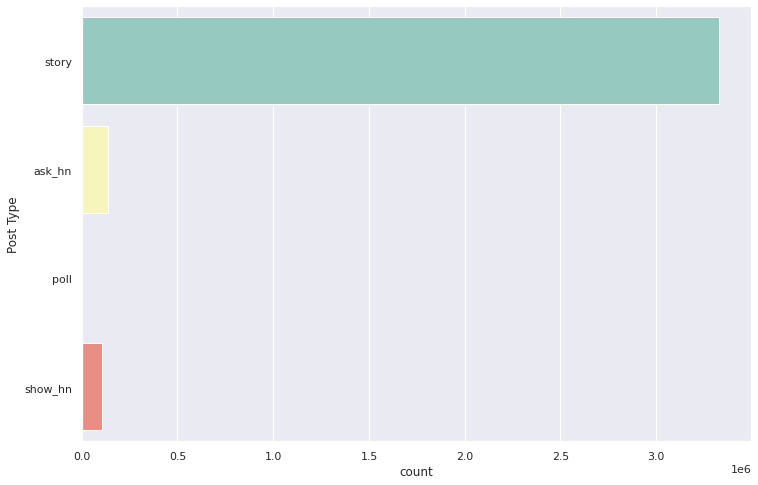

In [24]:
plt.figure(figsize=[12,8])
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df,y='Post Type',palette="Set3")

In [25]:
df['Post Type'].value_counts()

story      3330064
ask_hn      139310
show_hn     105903
poll          1687
Name: Post Type, dtype: int64

In [26]:
# Top 10 Authors 
df['Author'].value_counts()[:10]

rbanffy       24580
Tomte         17045
tosh          13974
jonbaer       12895
pseudolus     12614
ingve         11627
evo_9          8849
prostoalex     8297
bookofjoe      8109
shawndumas     8007
Name: Author, dtype: int64

In [27]:
df['Points'].value_counts()[:20] # Top points

1     1409038
2      830235
3      363449
4      174285
5       98904
6       64798
7       47500
8       36334
9       29386
10      23863
11      20295
12      17419
13      15299
14      13601
15      12018
16      10989
17      10224
18       9214
19       8645
20       7817
Name: Points, dtype: int64

<AxesSubplot:xlabel='Number of Comments', ylabel='Density'>

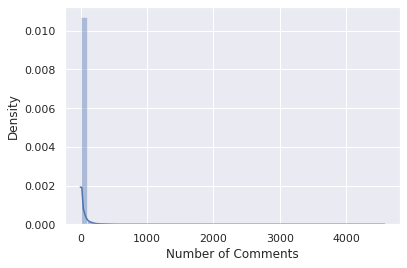

In [28]:
sns.distplot(df['Number of Comments'])

- Very less videos have more comments

In [29]:
df

,Object ID,Title,Post Type,Author,Created At,Points,Number of Comments,Dates,Hours,Year,Month,Day,week,Weekday,Hour,Minute
0,1,Y Combinator,story,pg,2006-10-09 18:21:51,61,18.0,2006-10-09,2006-10-09 18:21:51,2006,10,9,41,Monday,18,21
1,2,A Student's Guide to Startups,story,phyllis,2006-10-09 18:30:28,16,1.0,2006-10-09,2006-10-09 18:30:28,2006,10,9,41,Monday,18,30
2,3,Woz Interview: the early days of Apple,story,phyllis,2006-10-09 18:40:33,7,1.0,2006-10-09,2006-10-09 18:40:33,2006,10,9,41,Monday,18,40
3,4,NYC Developer Dilemma,story,onebeerdave,2006-10-09 18:47:42,5,1.0,2006-10-09,2006-10-09 18:47:42,2006,10,9,41,Monday,18,47
4,5,"Google, YouTube acquisition announcement could...",story,perler,2006-10-09 18:51:04,7,1.0,2006-10-09,2006-10-09 18:51:04,2006,10,9,41,Monday,18,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576959,30853436,Nike's 3-D Air Max Billboard in Japan,story,taubek,2022-03-30 10:37:50,1,0.0,2022-03-30,2022-03-30 10:37:50,2022,3,30,13,Wednesday,10,37
3576960,30853442,Electropedia: The World's Online Electrotechni...,story,gjvc,2022-03-30 10:39:10,1,0.0,2022-03-30,2022-03-30 10:39:10,2022,3,30,13,Wednesday,10,39
3576961,30853461,Intel Core i7-12700K and i5-12600K Review: Hig...,story,rbanffy,2022-03-30 10:43:01,1,0.0,2022-03-30,2022-03-30 10:43:01,2022,3,30,13,Wednesday,10,43
3576962,30853465,Impulse Space is betting on a future where lau...,story,rbanffy,2022-03-30 10:44:12,1,0.0,2022-03-30,2022-03-30 10:44:12,2022,3,30,13,Wednesday,10,44


# Votes

Text(0.5, 1.0, 'Votes/Points by Hours during weekdays')

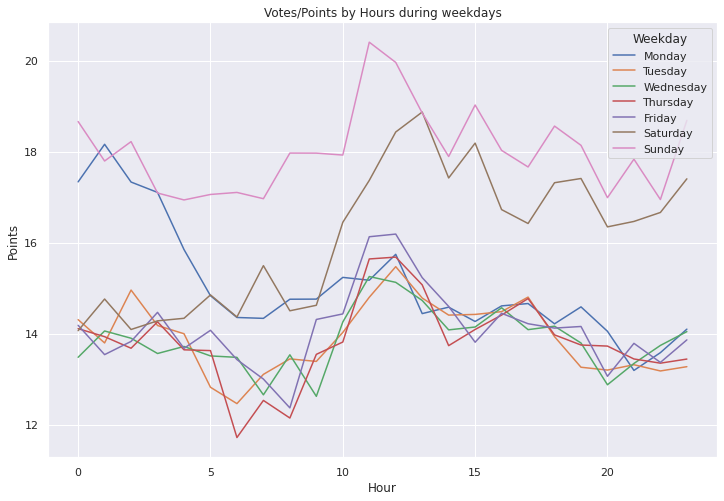

In [30]:
plt.figure(figsize=[12,8])
sns.lineplot(x=df['Hour'],y=df['Points'],hue=df['Weekday'],ci=None).set_title('Votes/Points by Hours during weekdays')

---> ## Include percentiles *

In [31]:
df_1 = df.copy()

<AxesSubplot:xlabel='Hour'>

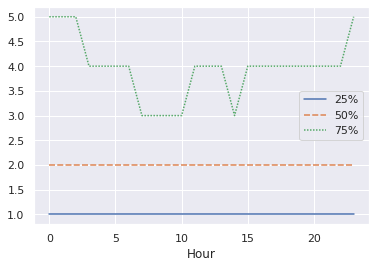

In [32]:
df_1 = df_1.groupby(['Hour']).describe()
sns.lineplot(data=df_1['Points'][['25%', '50%', '75%']])

In [33]:
df_1['Points'].quantile(q=0.25)

count    99596.250000
mean        14.148293
std         56.649167
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       2846.250000
Name: 0.25, dtype: float64

Text(0.5, 1.0, 'Votes/Points by Minutes during hours of the day')

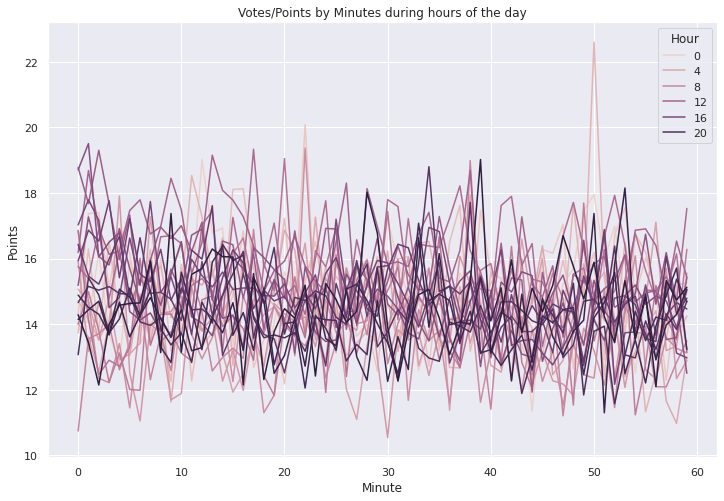

In [34]:
plt.figure(figsize=[12,8])
sns.lineplot(x=df['Minute'],y=df['Points'],hue=df['Hour'],ci=None).set_title('Votes/Points by Minutes during hours of the day')

In [35]:
# Quantiles by Minute
df_2 = df.copy()
df_2 = df_2.groupby(['Minute']).describe()

Text(0.5, 1.0, 'Point between various quantiles')

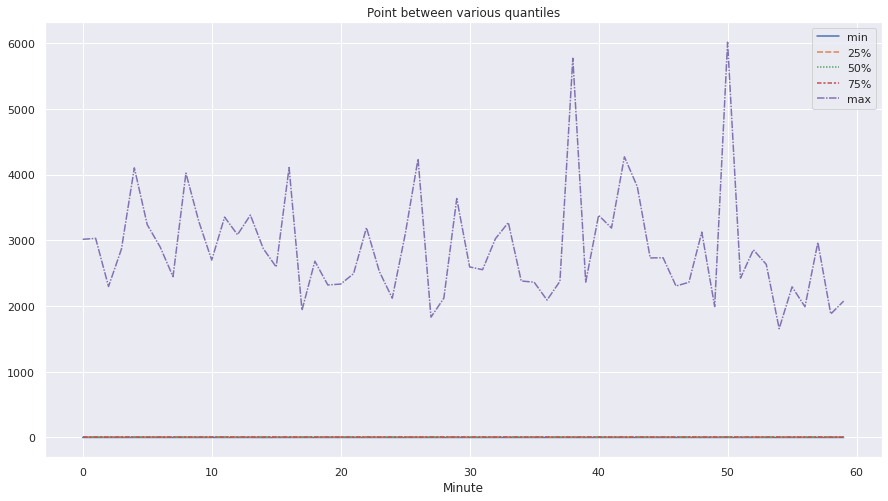

In [36]:
plt.figure(figsize=[15,8])
sns.lineplot(data=df_2['Points'][['min','25%', '50%', '75%','max']]).set_title('Point between various quantiles')

(1.0, 6.0)

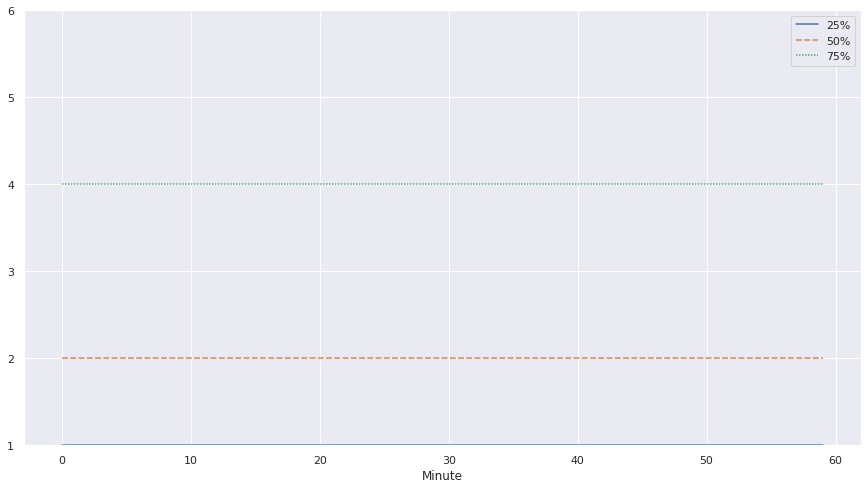

In [37]:
plt.figure(figsize=[15,8])
sns.lineplot(data=df_2['Points'][['25%', '50%', '75%']]).set_ylim(1, 6)

In [38]:
df_2['Points'].quantile(q=0.25)

count    59338.500000
mean        14.430501
std         57.523182
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max       2354.250000
Name: 0.25, dtype: float64

Text(0.5, 1.0, 'Votes/Points by week during various years')

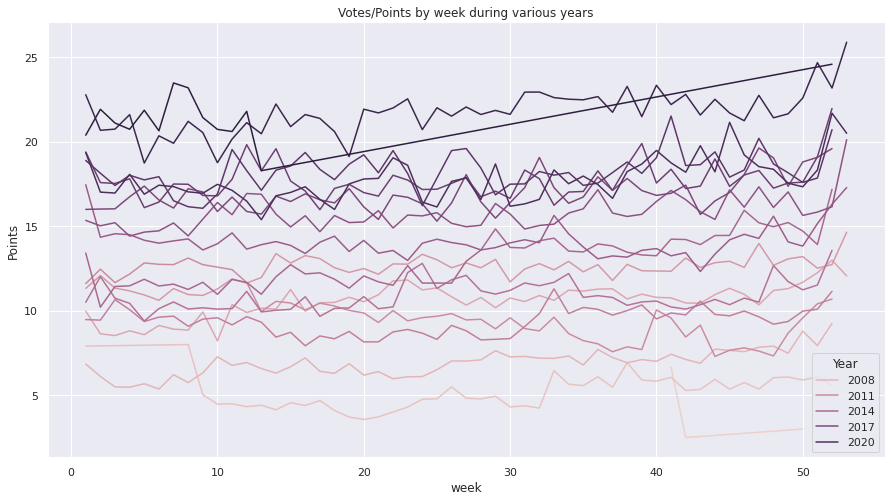

In [39]:
plt.figure(figsize=[15,8])
sns.lineplot(x=df['week'],y=df['Points'],hue=df['Year'],ci=None).set_title('Votes/Points by week during various years')

Text(0.5, 1.0, 'Points between various quantiles')

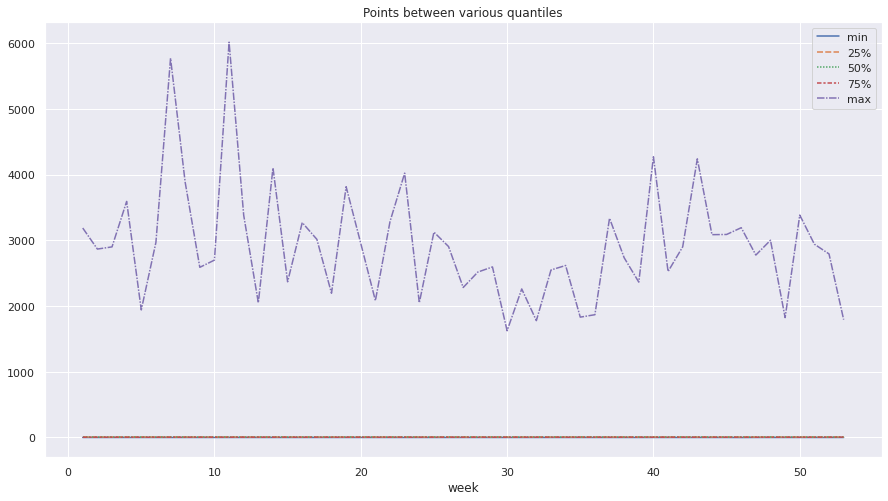

In [40]:
# Quantiles by Week
df_3 = df.copy()
df_3 = df_3.groupby(['week']).describe()
plt.figure(figsize=[15,8])
sns.lineplot(data=df_3['Points'][['min','25%', '50%', '75%','max']]).set_title('Points between various quantiles')

Text(0.5, 1.0, 'Point between 25 to 75th quantiles')

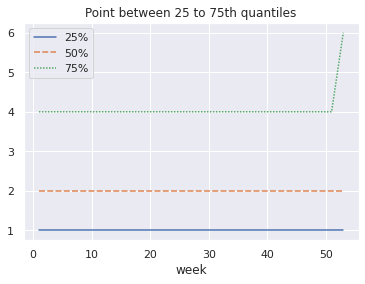

In [41]:
sns.lineplot(data=df_3['Points'][['25%', '50%', '75%']]).set_title('Point between 25 to 75th quantiles')

Text(0.5, 1.0, 'Overall points during the years')

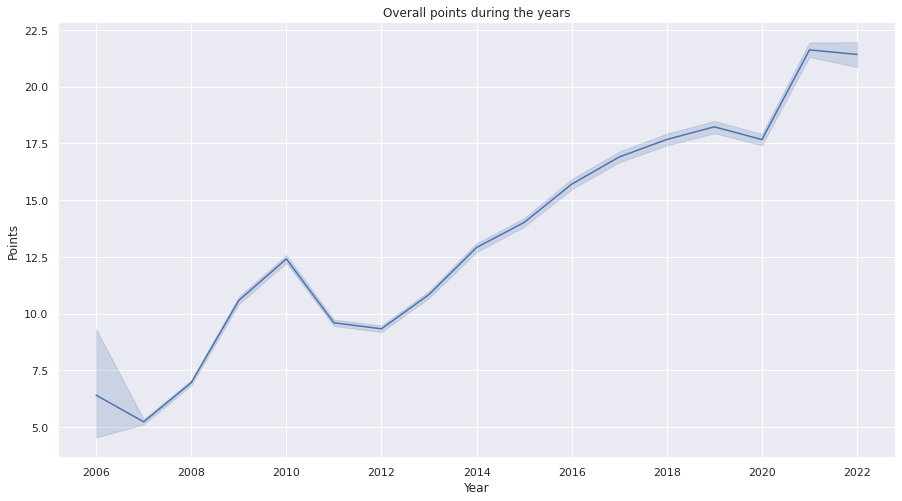

In [42]:
# Points Overall by years
plt.figure(figsize=[15,8])
sns.lineplot(data = df, x = 'Year',y='Points').set_title('Overall points during the years')

# Comments

Text(0.5, 1.0, 'Comments by Hours during weekdays')

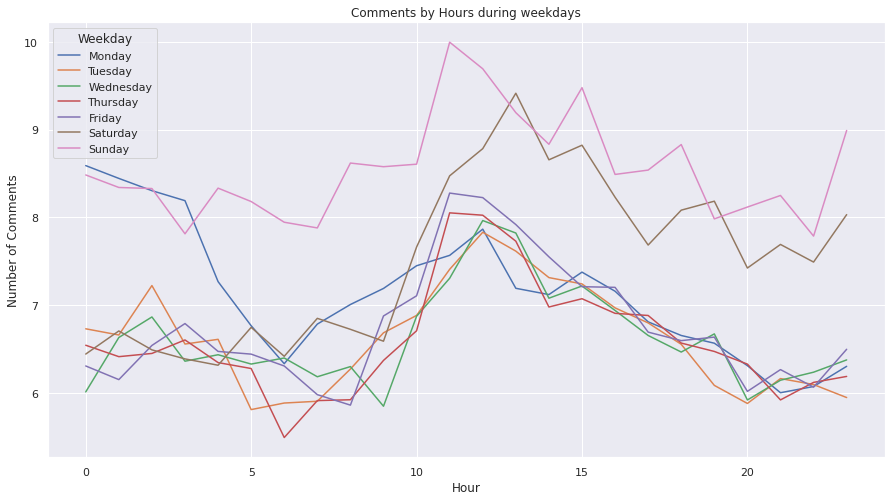

In [43]:
plt.figure(figsize=[15,8])
sns.lineplot(x=df['Hour'],y=df['Number of Comments'],hue=df['Weekday'],ci=None).set_title('Comments by Hours during weekdays')

<AxesSubplot:xlabel='Hour'>

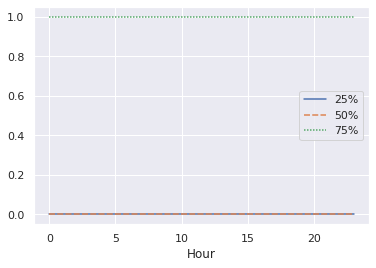

In [44]:
dfc_1 = df.copy()
dfc_1 = dfc_1.groupby(['Hour']).describe()
sns.lineplot(data=dfc_1['Number of Comments'][['25%', '50%', '75%']])

Text(0.5, 1.0, 'Comments by Minutes during hours of the day')

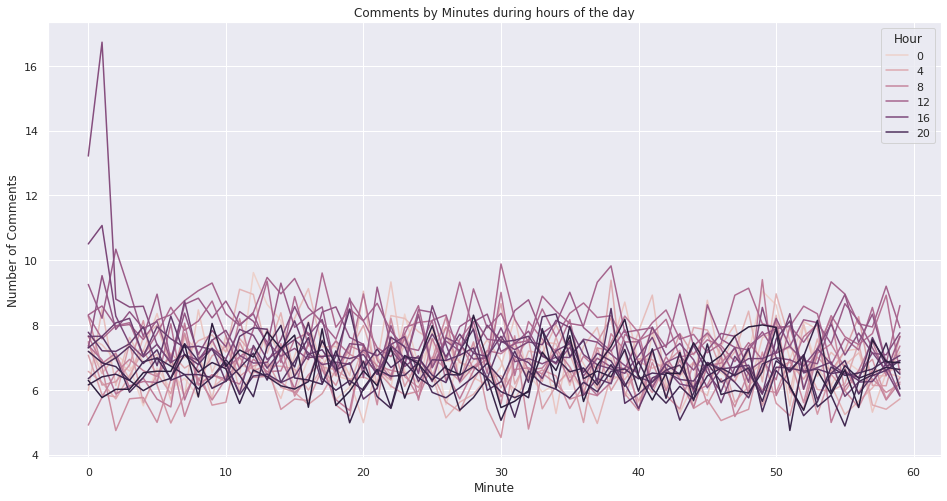

In [45]:
plt.figure(figsize=[16,8])
sns.lineplot(x=df['Minute'],y=df['Number of Comments'],hue=df['Hour'],ci=None).set_title('Comments by Minutes during hours of the day')

In [46]:
dfc_2 = df.copy()

<AxesSubplot:xlabel='Minute'>

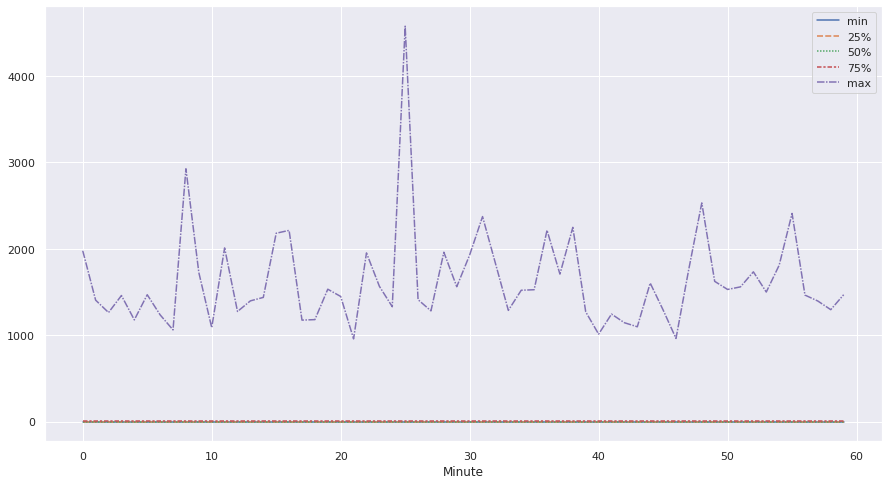

In [47]:
dfc_2 = dfc_2.groupby(['Minute']).describe()
plt.figure(figsize=[15,8])
sns.lineplot(data=dfc_2['Number of Comments'][['min','25%', '50%', '75%','max']])

Text(0.5, 1.0, 'Comments quantiles between above min to 75th during minutes')

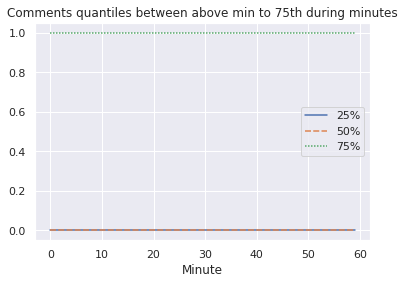

In [48]:
sns.lineplot(data=dfc_2['Number of Comments'][['25%', '50%', '75%']]).set_title('Comments quantiles between above min to 75th during minutes')

Text(0.5, 1.0, 'Comments by week during various years')

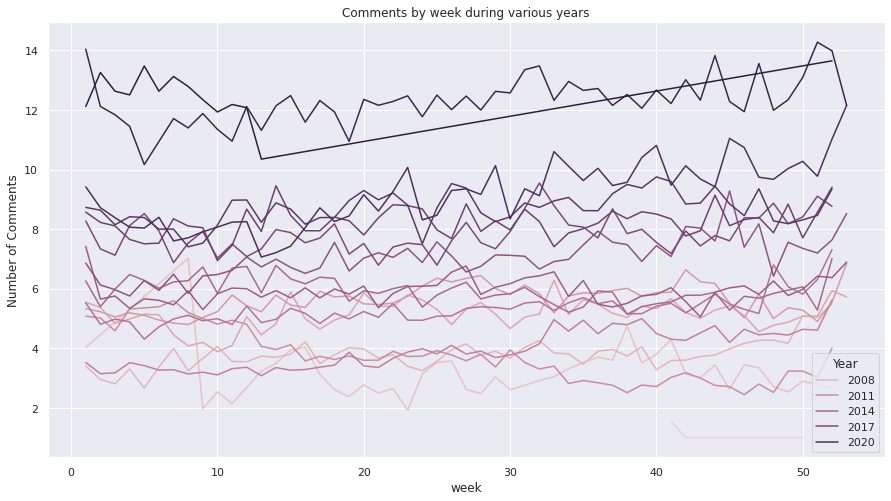

In [49]:
plt.figure(figsize=[15,8])
sns.lineplot(x=df['week'],y=df['Number of Comments'],hue=df['Year'],ci=None).set_title('Comments by week during various years')

<AxesSubplot:xlabel='week'>

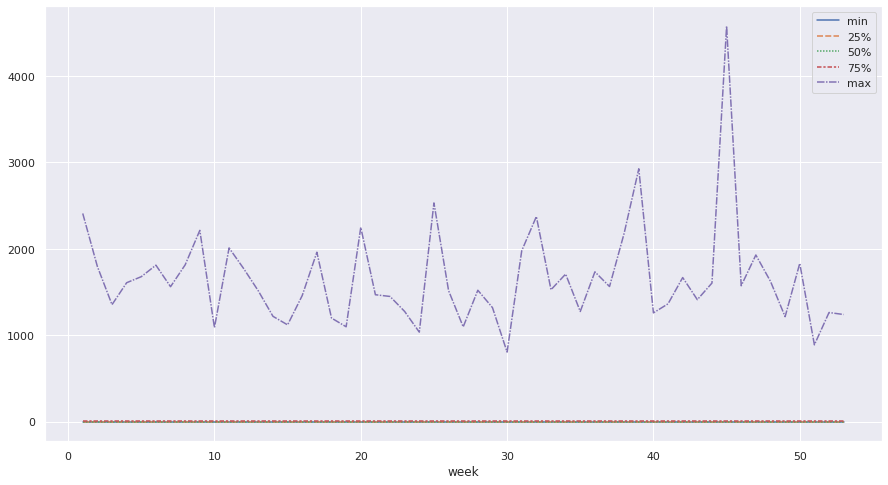

In [50]:
dfc_3 = df.copy()
dfc_3 = dfc_3.groupby(['week']).describe()
plt.figure(figsize=[15,8])
sns.lineplot(data=dfc_3['Number of Comments'][['min','25%', '50%', '75%','max']])

Text(0.5, 1.0, 'Comments quantiles between above min to 75th')

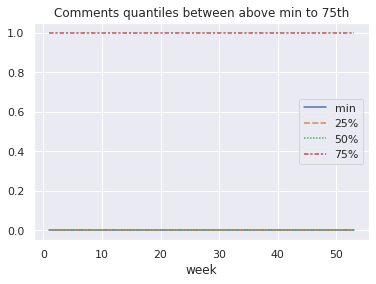

In [51]:
sns.lineplot(data=dfc_3['Number of Comments'][['min','25%', '50%', '75%']]).set_title('Comments quantiles between above min to 75th')

Text(0.5, 1.0, 'Comments overs years')

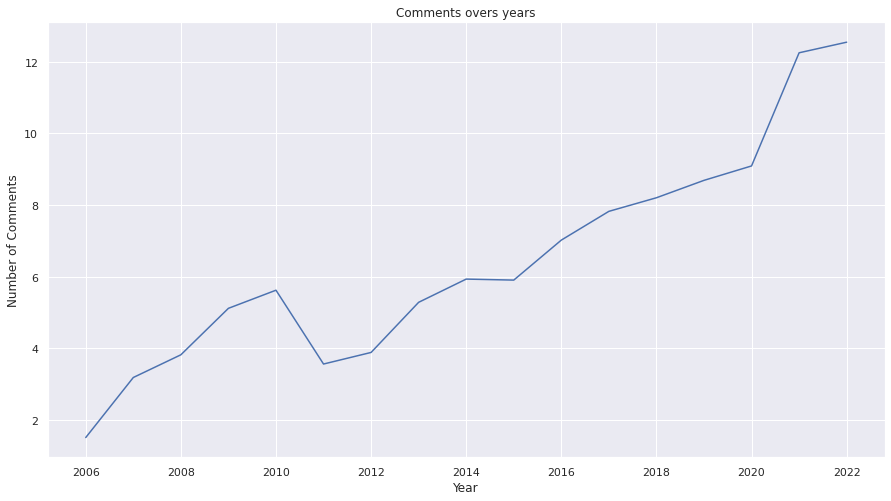

In [52]:
# Comments Overall by years
plt.figure(figsize=[15,8])
sns.lineplot(data = df, x = 'Year',y='Number of Comments',ci=None).set_title('Comments overs years')

<AxesSubplot:title={'center':'Comments & points overs years'}, xlabel='Year', ylabel='Number of Comments'>

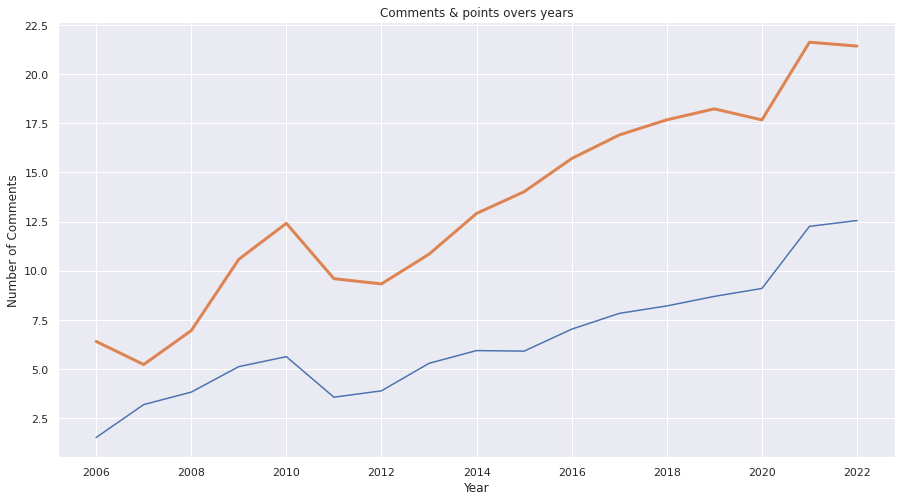

In [53]:
# Comments  & Points Overall by years
plt.figure(figsize=[15,8])
sns.lineplot(data = df, x = 'Year',y='Number of Comments',ci=None).set_title('Comments & points overs years')
sns.lineplot(data = df, x = 'Year',y='Points',ci=None,linewidth= 3)